# First Name:
# Last Name:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
pd.set_option('display.float_format', lambda x:'%.2f'%x)

gapminder = pd.read_csv('gapminder.csv', low_memory=False)
gapminder.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7


In [3]:
gapminder['internetuserate'] = pd.to_numeric(gapminder['internetuserate'],errors='coerce')
gapminder['urbanrate'] = pd.to_numeric(gapminder['urbanrate'],errors='coerce')
gapminder['incomeperperson'] = pd.to_numeric(gapminder['incomeperperson'],errors='coerce')

# Example 1 - Linear and Multiple

In [4]:
sub1 = gapminder[['internetuserate', 'urbanrate', 'incomeperperson']].dropna()
sub1.head()

,internetuserate,urbanrate,incomeperperson
1,44.99,46.72,1915.00
2,12.50,65.22,2231.99
3,81.00,88.92,21943.34
4,10.00,56.70,1381.00
5,80.65,30.46,11894.46


In [5]:
# center quantitative variables for regression analysis
sub1['internetuserate_c'] = (sub1['internetuserate'] - sub1['internetuserate'].mean())
sub1['urbanrate_c'] = (sub1['urbanrate'] - sub1['urbanrate'].mean())
sub1['incomeperperson_c'] = (sub1['incomeperperson'] - sub1['incomeperperson'].mean())

sub1.head()

,internetuserate,urbanrate,incomeperperson,internetuserate_c,urbanrate_c,incomeperperson_c
1,44.99,46.72,1915.00,9.70,-9.18,-6368.35
2,12.50,65.22,2231.99,-22.79,9.32,-6051.36
3,81.00,88.92,21943.34,45.71,33.02,13659.99
4,10.00,56.70,1381.00,-25.29,0.80,-6902.35
5,80.65,30.46,11894.46,45.36,-25.44,3611.11


In [6]:
reg1 = smf.ols('internetuserate_c ~ urbanrate_c + incomeperperson_c', data=sub1).fit()
print (reg1.summary())

                            OLS Regression Results                            
Dep. Variable:      internetuserate_c   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     167.7
Date:                Sun, 25 Mar 2018   Prob (F-statistic):           9.18e-42
Time:                        14:15:21   Log-Likelihood:                -768.44
No. Observations:                 182   AIC:                             1543.
Df Residuals:                     179   BIC:                             1552.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3.351e-15      1.23

# Example 2 - Linear

In [22]:
# convert to numeric format
gapminder['femaleemployrate'] = pd.to_numeric(gapminder['femaleemployrate'], errors='coerce')
sub2 = gapminder[['urbanrate', 'femaleemployrate']].dropna()
sub2.head()

,urbanrate,femaleemployrate
0,24.04,25.60
1,46.72,42.10
2,65.22,31.70
4,56.70,69.40
6,92.00,45.90


<IPython.core.display.Javascript object>


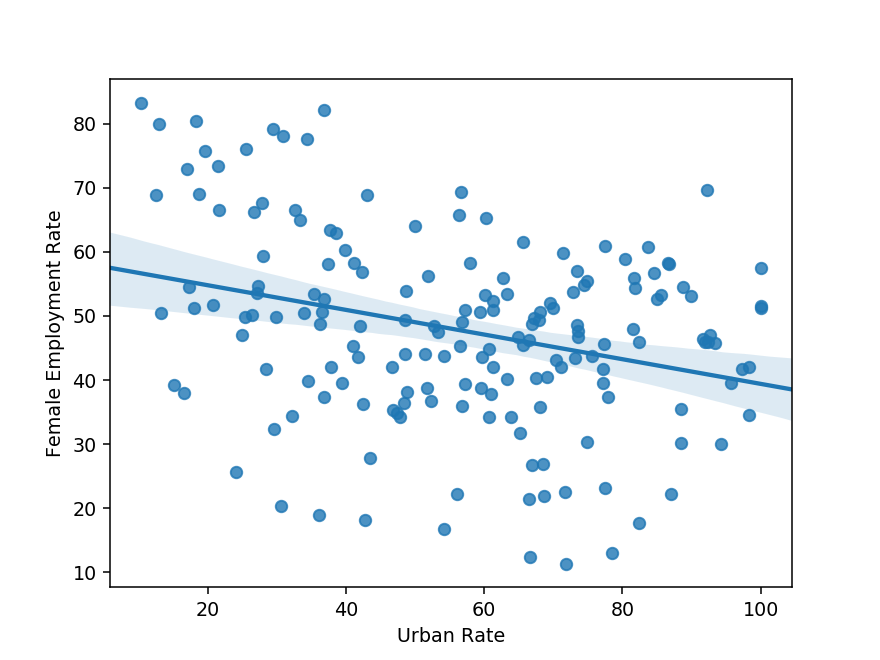

Text(0,0.5,'Female Employment Rate')

In [23]:
%matplotlib notebook
plt.figure()
# first order (linear) scatterplot
scat1 = sns.regplot(x="urbanrate", y="femaleemployrate", fit_reg=True, data=sub2)

plt.xlabel('Urban Rate')
plt.ylabel('Female Employment Rate')

In [24]:
sub2['urbanrate_c'] = (sub2['urbanrate'] - sub2['urbanrate'].mean())
sub2['femaleemployrate_c'] = (sub2['femaleemployrate'] - sub2['femaleemployrate'].mean())

sub2.head()

,urbanrate,femaleemployrate,urbanrate_c,femaleemployrate_c
0,24.04,25.60,-32.60,-22.15
1,46.72,42.10,-9.92,-5.65
2,65.22,31.70,8.58,-16.05
4,56.70,69.40,0.06,21.65
6,92.00,45.90,35.36,-1.85


In [25]:
reg2 = smf.ols('femaleemployrate_c ~ urbanrate_c', data=sub2).fit()
print (reg2.summary())

                            OLS Regression Results                            
Dep. Variable:     femaleemployrate_c   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     17.28
Date:                Sun, 25 Mar 2018   Prob (F-statistic):           5.08e-05
Time:                        14:30:18   Log-Likelihood:                -702.52
No. Observations:                 173   AIC:                             1409.
Df Residuals:                     171   BIC:                             1415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.773e-15      1.074   5.38e-15      

# Example 2 - Polynomial

<IPython.core.display.Javascript object>


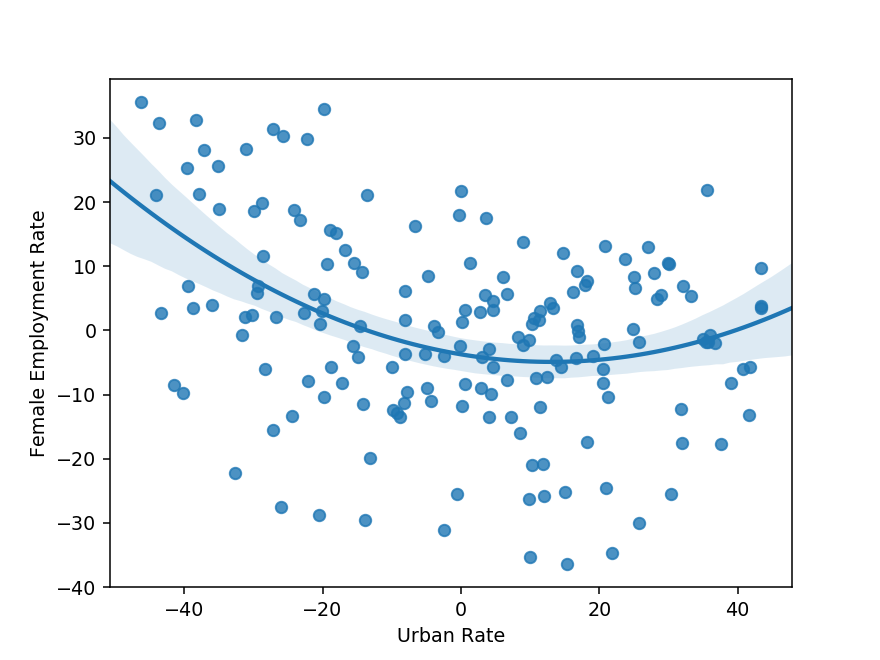

Text(0,0.5,'Female Employment Rate')

In [30]:
#fit second order polynomial
# run the 2 scatterplots together to get second order fit lines
plt.figure()
scat1 = sns.regplot(x="urbanrate_c", y="femaleemployrate_c", order=2, data=sub2)
plt.xlabel('Urban Rate')
plt.ylabel('Female Employment Rate')

In [31]:
reg2 = smf.ols('femaleemployrate_c ~  I(urbanrate_c**2)', data=sub2).fit()
print (reg2.summary())

                            OLS Regression Results                            
Dep. Variable:     femaleemployrate_c   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     14.51
Date:                Sun, 25 Mar 2018   Prob (F-statistic):           0.000194
Time:                        14:33:49   Log-Likelihood:                -703.81
No. Observations:                 173   AIC:                             1412.
Df Residuals:                     171   BIC:                             1418.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -4.0206    

# Example 3 - Multiple & poly

In [32]:
sub3 = gapminder[['internetuserate', 'urbanrate', 'incomeperperson','femaleemployrate']].dropna()
sub3.head()

,internetuserate,urbanrate,incomeperperson,femaleemployrate
1,44.99,46.72,1915.00,42.10
2,12.50,65.22,2231.99,31.70
4,10.00,56.70,1381.00,69.40
6,36.00,92.00,10749.42,45.90
7,44.00,63.86,1326.74,34.20


In [33]:
sub3['femaleemployrate_c'] = (sub3['femaleemployrate'] - sub3['femaleemployrate'].mean())
sub3['internetuserate_c'] = (sub3['internetuserate'] - sub3['internetuserate'].mean())
sub3['urbanrate_c'] = (sub3['urbanrate'] - sub3['urbanrate'].mean())
sub3['incomeperperson_c'] = (sub3['incomeperperson'] - sub3['incomeperperson'].mean())

sub3.head()

,internetuserate,urbanrate,incomeperperson,femaleemployrate,femaleemployrate_c,internetuserate_c,urbanrate_c,incomeperperson_c
1,44.99,46.72,1915.00,42.10,-5.89,10.62,-9.98,-5777.45
2,12.50,65.22,2231.99,31.70,-16.29,-21.87,8.52,-5460.46
4,10.00,56.70,1381.00,69.40,21.41,-24.37,0.00,-6311.45
6,36.00,92.00,10749.42,45.90,-2.09,1.63,35.30,3056.97
7,44.00,63.86,1326.74,34.20,-13.79,9.63,7.16,-6365.71


In [34]:
reg3 = smf.ols('femaleemployrate_c ~ internetuserate_c + incomeperperson_c + I(urbanrate_c**2)', data=sub3).fit()
print (reg3.summary())

                            OLS Regression Results                            
Dep. Variable:     femaleemployrate_c   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     6.628
Date:                Sun, 25 Mar 2018   Prob (F-statistic):           0.000301
Time:                        14:53:55   Log-Likelihood:                -661.99
No. Observations:                 164   AIC:                             1332.
Df Residuals:                     160   BIC:                             1344.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -3.8653    

# Evaluating model

C:\Users\jc443343\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<IPython.core.display.Javascript object>


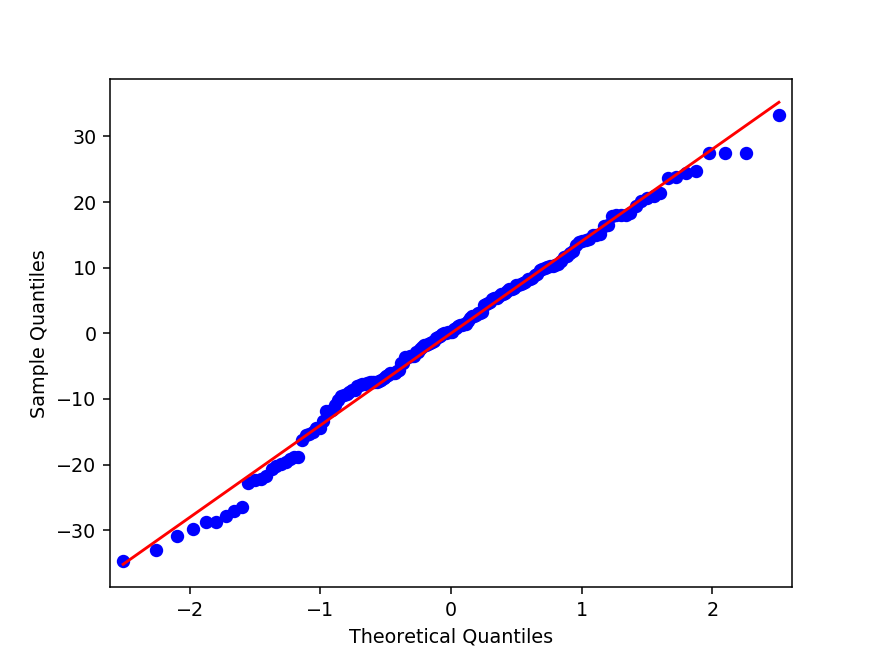

In [35]:
import statsmodels.api as sm
fig4=sm.qqplot(reg3.resid, line='r')

<IPython.core.display.Javascript object>


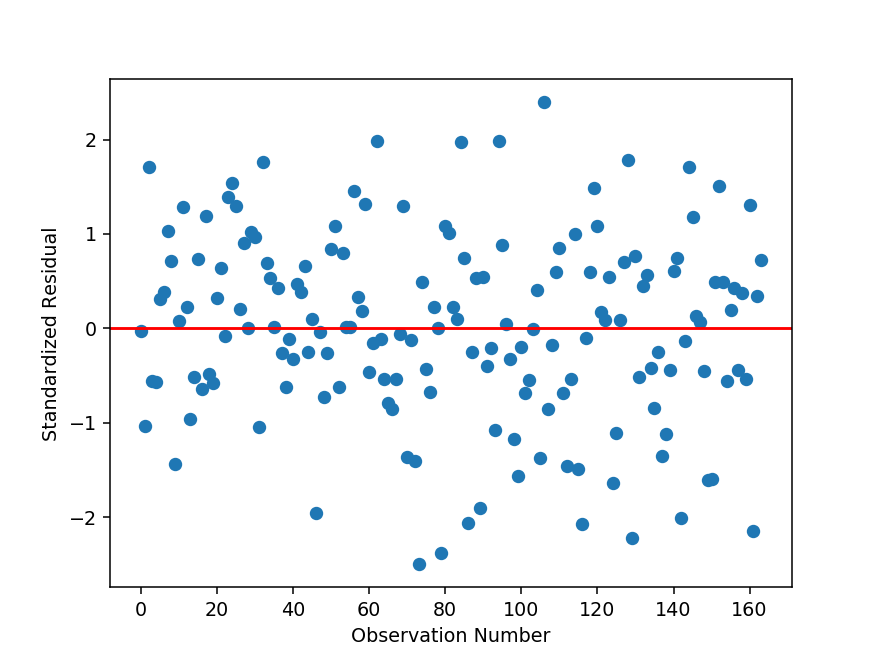

Text(0.5,0,'Observation Number')

In [36]:
# simple plot of residuals
stdres=pd.DataFrame(reg3.resid_pearson)
plt.figure()
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')

In [37]:
percentage_over2sd = (np.count_nonzero( stdres[0] > 2) + np.count_nonzero( stdres[0] < -2))/len(stdres)*100
print (percentage_over2sd)

4.878048780487805


In [38]:
percentage_over2_5sd = (np.count_nonzero( stdres[0] > 2.5) + np.count_nonzero( stdres[0] < -2.5))/len(stdres)*100
print (percentage_over2_5sd)

0.6097560975609756
